# Memory access timeline

In [1]:
import pandas as pd

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_interface_bit_rates'
data, = pd.read_html(url, match='FPM DRAM', header=0)

In [3]:
data.columns = ['Type', 'Chip', 'InternalFreq', 'BusFreq', 'BusSpeed', 'TransferRate', 'TransferRateGb']
data.head()

Type      Chip InternalFreq  BusFreq    BusSpeed  TransferRate  \
0          FPM DRAM     45 ns       22 MHz   22 MHz  0.177 GT/s  1.416 Gbit/s   
1          EDO DRAM     30 ns       33 MHz   33 MHz  0.266 GT/s  2.128 Gbit/s   
2   PC-66 SDR SDRAM  10/15 ns       66 MHz   66 MHz  0.066 GT/s  4.264 Gbit/s   
3  PC-100 SDR SDRAM      8 ns      100 MHz  100 MHz  0.100 GT/s    6.4 Gbit/s   
4  PC-133 SDR SDRAM  7/7.5 ns      133 MHz  133 MHz  0.133 GT/s  8.528 Gbit/s   

  TransferRateGb  
0       177 MB/s  
1       266 MB/s  
2       533 MB/s  
3       800 MB/s  
4     1.066 GB/s

In [4]:
def to_number(x, unit):
    return float(x.replace(unit, ""))

In [5]:
data['InternalFreq'] = data.InternalFreq.apply(to_number, args=('MHz',))
data['BusFreq'] = data.BusFreq.apply(to_number, args=('MHz',))
data['TransferRate'] = data.TransferRate.apply(to_number, args=('Gbit/s',))

In [6]:
data.head()

Type      Chip  InternalFreq  BusFreq    BusSpeed  \
0          FPM DRAM     45 ns          22.0     22.0  0.177 GT/s   
1          EDO DRAM     30 ns          33.0     33.0  0.266 GT/s   
2   PC-66 SDR SDRAM  10/15 ns          66.0     66.0  0.066 GT/s   
3  PC-100 SDR SDRAM      8 ns         100.0    100.0  0.100 GT/s   
4  PC-133 SDR SDRAM  7/7.5 ns         133.0    133.0  0.133 GT/s   

   TransferRate TransferRateGb  
0         1.416       177 MB/s  
1         2.128       266 MB/s  
2         4.264       533 MB/s  
3         6.400       800 MB/s  
4         8.528     1.066 GB/s

Adding Year of sold, regarding these  sources

* https://www.computerhope.com/history/memory.htm
* http://www.informit.com/articles/article.aspx?p=1416688&seqNum=2
* https://en.wikipedia.org/wiki/DDR_SDRAM

In [7]:
Years = { "FPM DRAM" : 1987
        , "EDO DRAM" : 1995
        , "PC-66 SDR SDRAM" : 1996
        , "PC-133 SDR SDRAM" : 1998
        , "PC-3200 DDR SDRAM" : 2000
        , "PC2-8500 DDR2 SDRAM" : 2003
        , "PC3-17000 DDR3 SDRAM" : 2007
        , "PC4-25600 DDR4 SDRAM" : 2014}

In [8]:
data.set_index("Type", inplace=True)
data.head()

Chip  InternalFreq  BusFreq    BusSpeed  TransferRate  \
Type                                                                          
FPM DRAM             45 ns          22.0     22.0  0.177 GT/s         1.416   
EDO DRAM             30 ns          33.0     33.0  0.266 GT/s         2.128   
PC-66 SDR SDRAM   10/15 ns          66.0     66.0  0.066 GT/s         4.264   
PC-100 SDR SDRAM      8 ns         100.0    100.0  0.100 GT/s         6.400   
PC-133 SDR SDRAM  7/7.5 ns         133.0    133.0  0.133 GT/s         8.528   

                 TransferRateGb  
Type                             
FPM DRAM               177 MB/s  
EDO DRAM               266 MB/s  
PC-66 SDR SDRAM        533 MB/s  
PC-100 SDR SDRAM       800 MB/s  
PC-133 SDR SDRAM     1.066 GB/s

In [9]:
data["Year"] = None
for t, y in Years.items():
    data.loc[t, 'Year'] = y

In [10]:
dy = data[ ~data.Year.isnull() ].sort_values('Year')
dy.loc['PC-66 SDR SDRAM', 'Chip'] = 'PC66'
dy

Chip  InternalFreq  BusFreq    BusSpeed  \
Type                                                                 
FPM DRAM                  45 ns          22.0     22.0  0.177 GT/s   
EDO DRAM                  30 ns          33.0     33.0  0.266 GT/s   
PC-66 SDR SDRAM            PC66          66.0     66.0  0.066 GT/s   
PC-133 SDR SDRAM       7/7.5 ns         133.0    133.0  0.133 GT/s   
PC-3200 DDR SDRAM       DDR-400         200.0    200.0  0.400 GT/s   
PC2-8500 DDR2 SDRAM   DDR2-1066         266.0    533.0  1.066 GT/s   
PC3-17000 DDR3 SDRAM  DDR3-2133         267.0   1067.0  2.133 GT/s   
PC4-25600 DDR4 SDRAM  DDR4-3200         400.0   1600.0    3.2 GT/s   

                      TransferRate TransferRateGb  Year  
Type                                                     
FPM DRAM                     1.416       177 MB/s  1987  
EDO DRAM                     2.128       266 MB/s  1995  
PC-66 SDR SDRAM              4.264       533 MB/s  1996  
PC-133 SDR SDRAM             8.528     1.066 GB/s  1998  
PC-3200 DDR SDRAM           25.600       3.2 GB/s  2000  
PC2-8500 DDR2 SDRAM         68.000       8.5 GB/s  2003  
PC3-17000 DDR3 SDRAM       136.528    17.066 GB/s  2007  
PC4-25600 DDR4 SDRAM       204.800      25.6 GB/s  2014

Processeur frequency regarding these URL:

* https://www.slideshare.net/meetdevraj/timeline-of-processors
* https://en.wikipedia.org/wiki/List_of_Intel_microprocessors

In [11]:
proc = pd.DataFrame({ 'Name' : ['Intel 8086', 'Intel 80386', 'Intel Pentium', 'Pentium 3',
                                          'Pentium 4', 'Pentium M', 'Intel Core', 'Core i3', 'i9-9900K'],
                      'Frequency' : [10, 33, 66, 600, 1400, 1700, 2300, 3333, 5000],  # Mhz
                      'Year' : [1978, 1985, 1993, 1999, 2002, 2003, 2006, 2010, 2018]})
proc.head()

Name  Frequency  Year
0     Intel 8086         10  1978
1    Intel 80386         33  1985
2  Intel Pentium         66  1993
3      Pentium 3        600  1999
4      Pentium 4       1400  2002

In [12]:
years_all = list(set(dy.Year) | set(proc.Year))
years_all.sort()

freq_all = list(set(dy.InternalFreq) | set(dy.BusFreq) | set(proc.Frequency))
freq_all.sort()

freq_all = [10,
 133.0,
 267.0,
 400.0,
 600,
 1067.0,
 1500,
 2300,
 3333,
 5000]

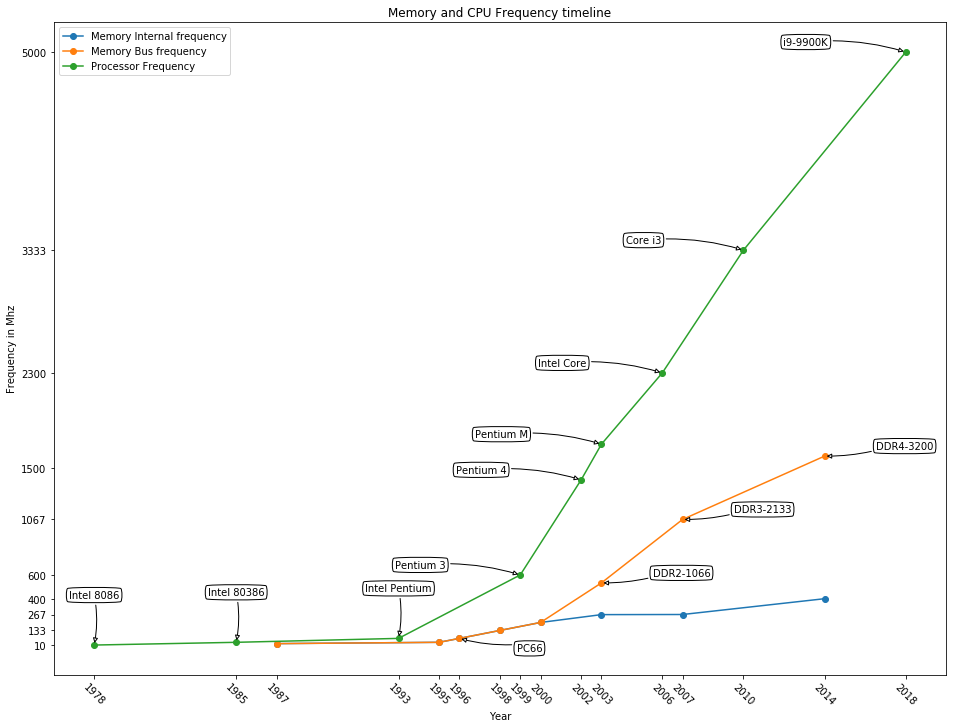

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

plt.plot(dy.Year, dy.InternalFreq, label="Memory Internal frequency", marker='o')
plt.plot(dy.Year, dy.BusFreq, label="Memory Bus frequency", marker='o')
plt.plot(proc.Year, proc.Frequency, label="Processor Frequency", marker='o')


for i in (0,1,2,3,4,5,6,7, 8):
    pos = (-100, 10) if i > 2 else (0, 50)
    plt.annotate(proc.loc[i, 'Name'],
                      xy=(proc.loc[i, 'Year'], proc.loc[i, 'Frequency']), xycoords='data',
                      xytext=pos, textcoords='offset points',
                      size=10, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.1",
                                      relpos=(0.5, 0.5),
                                      fc="w") )

for i in (-6, -3, -2, -1):
    pos = (80, 10) if i > -6 else (70, -10)
    plt.annotate(dy.iloc[i, 0],
                      xy=(dy.iloc[i, 6], dy.iloc[i, 2]), xycoords='data',
                      xytext=pos, textcoords='offset points',
                      size=10, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.1",
                                      relpos=(0.5, 1),
                                      fc="w") )

    
plt.title('Memory and CPU Frequency timeline')
plt.xlabel('Year')
plt.ylabel('Frequency in Mhz')
plt.xticks(years_all, rotation=-45) 
plt.yticks(freq_all)
plt.legend()
plt.savefig("memory-cpu-frequency-timeline.png")
plt.show()

# Ansible growth

Image créée en exécutant cette URL:

https://qa.debian.org/cgi-bin/popcon-png?packages=ansible%2C+puppetmaster%2C+salt-master%2C+libchef-ruby&show_installed=1&show_vote=0&show_old=0&show_recent=0&show_nofiles=0&want_percent=0&want_legend=1&want_ticks=1&from_date=2010&to_date=2018&hlght_date=&date_fmt=%25Y-%25m

![Graphique](https://qa.debian.org/cgi-bin/popcon-png?packages=ansible%2C+puppetmaster%2C+salt-master%2C+libchef-ruby&show_installed=1&show_vote=0&show_old=0&show_recent=0&show_nofiles=0&want_percent=0&want_legend=1&want_ticks=1&from_date=2010&to_date=2018&hlght_date=&date_fmt=%25Y-%25m)